Aim: Implementation of Classifying data using Linear Kernels in Support Vector Machines (SVMs).

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is particularly effective in solving binary classification problems, but can be extended to handle multi-class classification as well.

SVM works by finding an optimal hyperplane in a high-dimensional feature space that separates the data points of different classes with the maximum margin. The hyperplane is chosen such that it maximizes the distance (margin) between the nearest data points of different classes, known as support vectors.

The algorithm uses a kernel function to map the input data into a higher-dimensional space, where it becomes easier to find a hyperplane that can linearly separate the classes. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

In addition to linear separation, SVM can also handle non-linear decision boundaries by using the kernel trick. The kernel trick allows SVM to implicitly map the data points into a higher-dimensional space without explicitly computing the transformation, saving computational resources.

During the training phase, SVM optimizes a cost function that aims to find the hyperplane with the maximum margin while minimizing the classification errors. This optimization problem is typically solved using convex optimization techniques.

Once the SVM model is trained, it can be used to predict the class labels of new, unseen data points by determining which side of the hyperplane they fall on. The decision boundary is based on a threshold value, and the predicted class is determined by comparing the signed distance of the data point to the hyperplane.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('pulsar_data_train.csv')
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
dataset=dataset.dropna()
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [4]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [5]:
x = dataset.iloc[:, [4,0]]
y = dataset.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_test, y_train, y_test

(        Mean of the DM-SNR curve   Mean of the integrated profile
 12520                   3.354515                       115.375000
 1391                    3.549331                       130.312500
 9215                    1.459866                       126.789062
 4638                    3.006689                       104.546875
 11607                   0.443980                       118.968750
 ...                          ...                              ...
 10669                   1.689799                       122.039062
 12459                  55.751672                        92.078125
 6544                    3.829431                       121.250000
 4382                    0.954013                       119.929688
 3661                    2.868729                       123.804688
 
 [7418 rows x 2 columns],
         Mean of the DM-SNR curve   Mean of the integrated profile
 11372                   3.692308                       120.750000
 3450                   13.680602 

In [7]:
cols = x_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Fitting the SVM classifier to the training set:

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

Predicting the test set result:

In [9]:
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Creating the confusion matrix:

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1676,    8],
       [  63,  108]])

<ipython-input-11-aa5560be4a54>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)


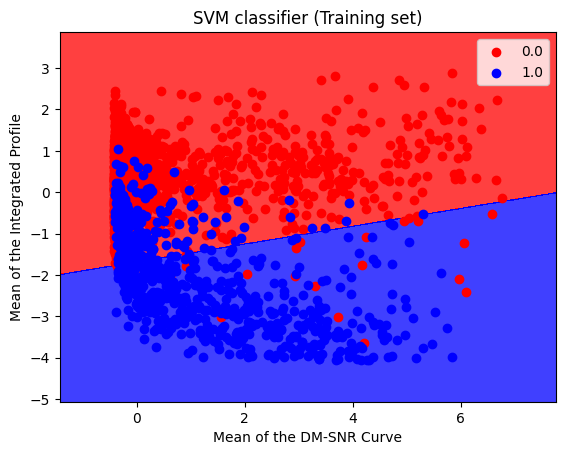

In [11]:
#train
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +
1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM classifier (Training set)')
plt.xlabel('Mean of the DM-SNR Curve')
plt.ylabel('Mean of the Integrated Profile')
plt.legend()
plt.show()

Visualizing the test set result:

<ipython-input-12-4d685cf1a26f>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


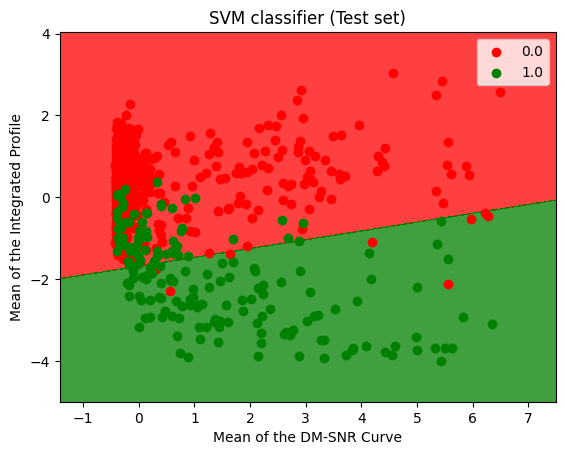

In [12]:
#test
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop =
x_set[:, 0].max() + 1, step =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +
1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM classifier (Test set)')
plt.xlabel('Mean of the DM-SNR Curve')
plt.ylabel('Mean of the Integrated Profile')
plt.legend()
plt.show()

Conclusions:

From this practical I have learned the implementation of Classifying data using Linear Kernels i Support Vector Machines (SVMs).